In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

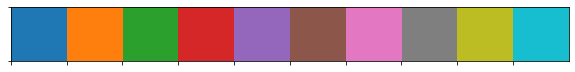

In [3]:
current_palette = sns.color_palette() 
sns.palplot(current_palette)

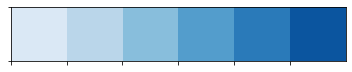

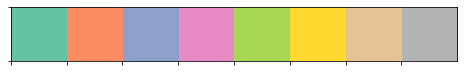

In [4]:
sns.palplot(sns.color_palette("Blues"))
sns.palplot(sns.color_palette("Set2"))

In [5]:
tips = sns.load_dataset("tips")
tips.info() 
# tips.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [6]:
# tips['day'].unique()
pd.pivot_table(tips, index = ["day"], values = ["tip"])
pd.pivot_table(tips, index = ["smoker"], values = ["tip"])
pd.pivot_table(tips, index = ["sex"], values = ["tip"])
pd.pivot_table(tips, index = ["time"], values = ["tip"])
pd.pivot_table(tips, index = ["time"], values = ["total_bill"])
tips.groupby("time")["total_bill"].mean()
tips.groupby("size")["tip"].mean()

size
1    1.437500
2    2.582308
3    3.393158
4    4.135405
5    4.028000
6    5.225000
Name: tip, dtype: float64

In [7]:
tips[["tip","size"]].corr()

,tip,size
tip,1.000000,0.489299
size,0.489299,1.000000


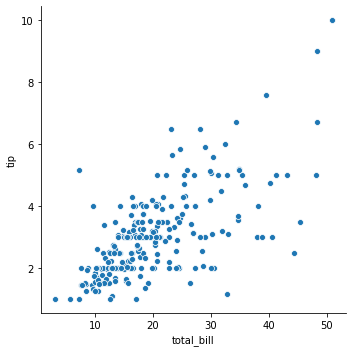

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips)
plt.show()

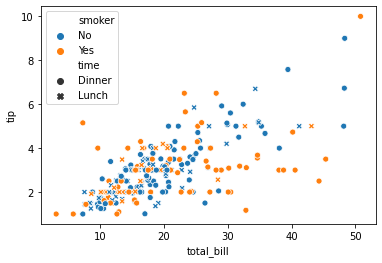

In [9]:
# sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips) 
sns.scatterplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips)
plt.show()

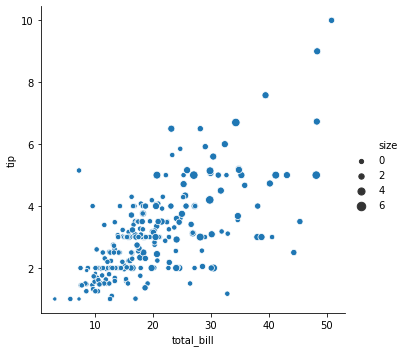

In [10]:
# sns.relplot(x="total_bill", y="tip", hue="size", data=tips)
sns.relplot(x="total_bill", y="tip", size="size", data=tips)
plt.show()

In [11]:
fmri = sns.load_dataset("fmri") 
fmri.info()
fmri.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   subject    1064 non-null   object 
 1   timepoint  1064 non-null   int64  
 2   event      1064 non-null   object 
 3   region     1064 non-null   object 
 4   signal     1064 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


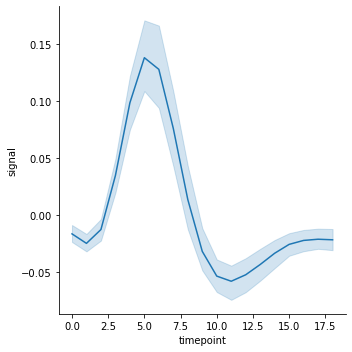

In [12]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri)
plt.show() # KDE 커널밀도추정

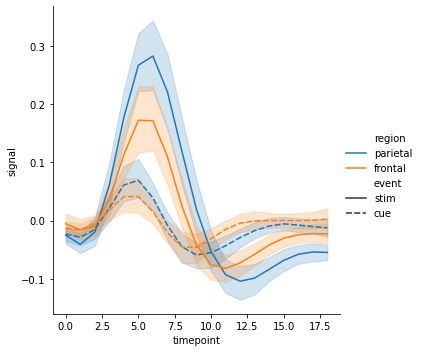

In [13]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri)
plt.show()    #hue : 생상 / 

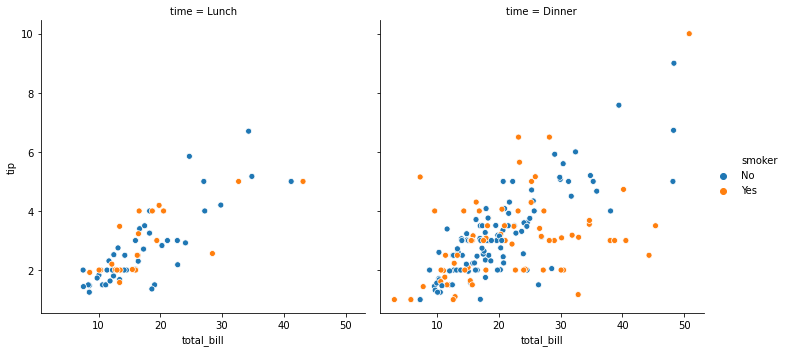

In [14]:
sns.relplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips)
plt.show()

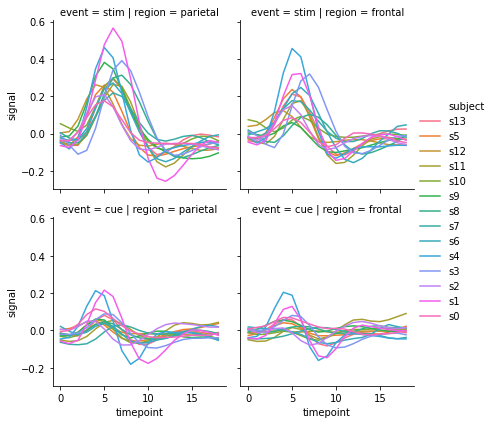

In [15]:
sns.relplot(x="timepoint", y="signal", hue="subject", col="region", 
            row="event", height=3, kind="line", estimator=None, data=fmri)  
            # estimator 커널속성을 없앤것. 밀도추정치 범위를 없애주는것
plt.show()

In [16]:
# fmri.query("region == 'frontal'")
# fmri[fmri['region'] == 'frontal']


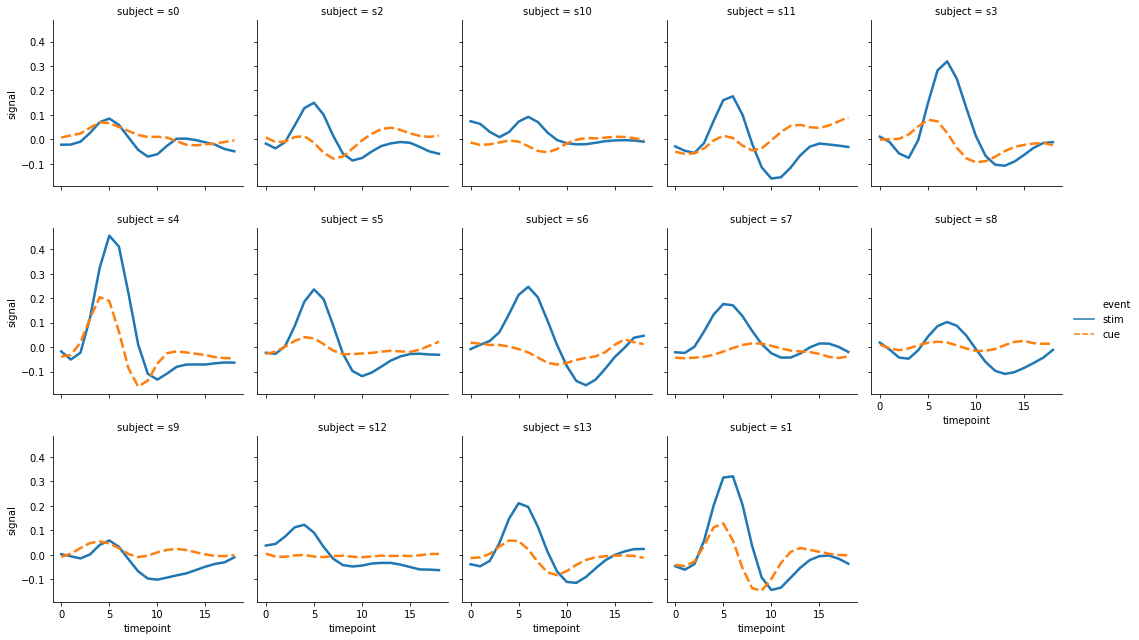

In [17]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event", 
            col="subject", col_wrap=5, height=3, linewidth=2.5, kind="line", 
            data=fmri.query("region == 'frontal'"))  
    #col_wrap=5 : 컬럼이 10개라 하더라도 한줄에 5개씩 보이게 하고 다음줄 넘어가서 나머지 볼수 있게 하는 설정
plt.show()

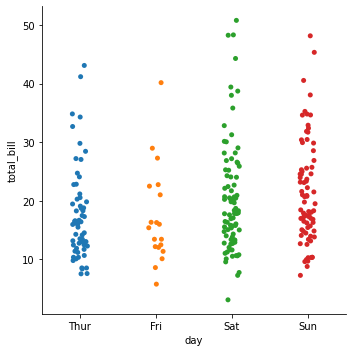

In [18]:
sns.catplot(x="day", y="total_bill", data=tips, jitter=True)
# jitter=False 하면 overplotting 되면서 데이터가 얼마나 들어 있는지 알수가 없다
# jitter : easing overplotting
plt.show()

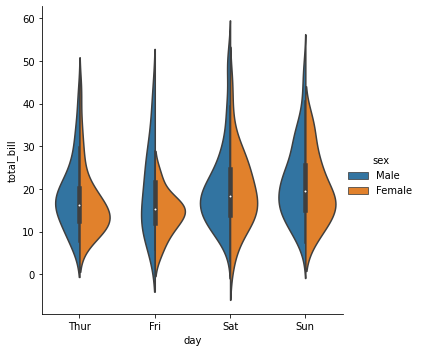

In [19]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="violin", split=True, data=tips)
plt.show()

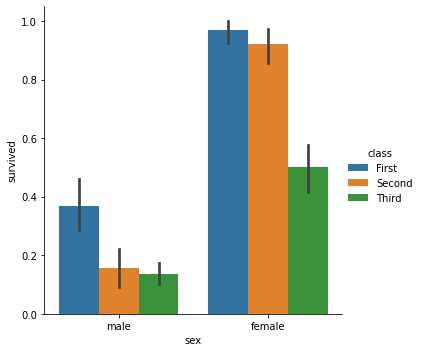

In [20]:
titanic = sns.load_dataset("titanic") 
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
plt.show()

In [21]:
exercise = sns.load_dataset("exercise") 

In [22]:
exercise.iloc[:, 1:].head()

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest


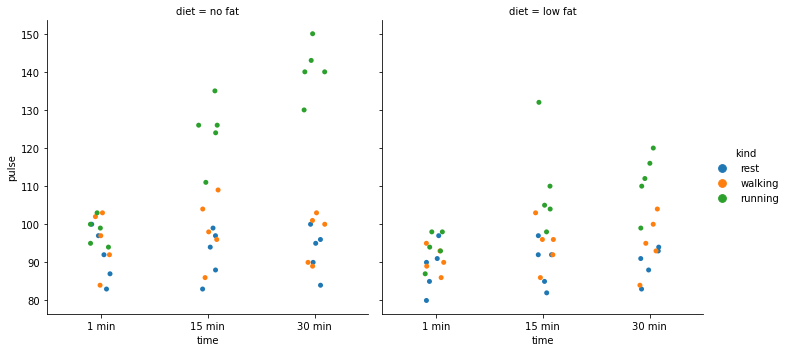

In [23]:
sns.catplot(x="time", y="pulse", hue="kind", col="diet", data=exercise)
plt.show()

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
crime_in_seoul = pd.read_csv('data-files/b.normed-crime-in-seoul.csv', 
                            encoding="utf-8",
                            index_col="구별")

In [26]:
crime_in_seoul.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.941176,0.916667,1.000000,1.000000,0.777283,0.857143,0.769231,0.428571,0.864846,570500.0,2780,4.857843,3.697074
강동구,0.155620,0.058824,0.166667,0.467528,0.437969,0.788462,1.000000,0.750000,0.333474,0.828909,453233.0,773,1.286607,3.700844
강북구,0.146974,0.529412,0.416667,0.133118,0.415445,0.823529,0.928571,1.000000,0.430962,0.886372,330192.0,748,1.641616,4.069435
강서구,0.461095,0.470588,0.416667,0.370649,0.614945,0.729008,1.000000,1.000000,0.601145,0.847521,603772.0,884,2.333944,4.177674
관악구,0.628242,0.411765,0.583333,0.589523,0.647479,0.690625,1.000000,0.888889,0.305617,0.801092,525515.0,1496,2.860342,3.686223


In [27]:
plt.rc('font', family='NanumGothic')

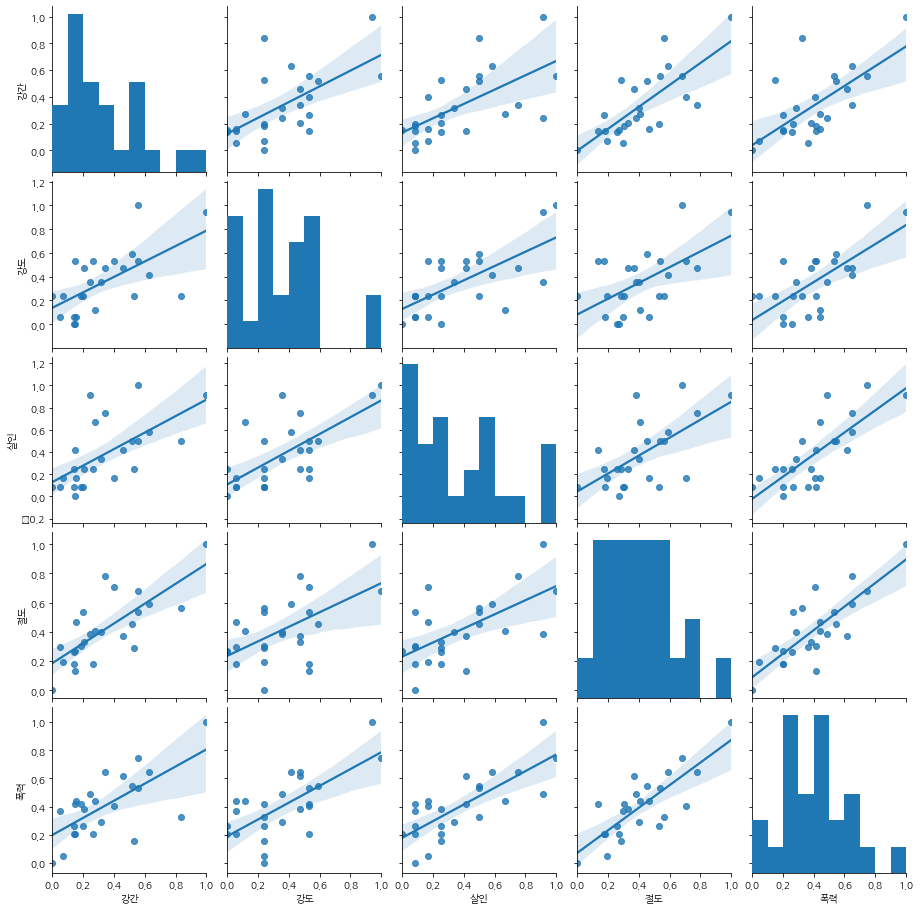

In [28]:
sns.pairplot(crime_in_seoul.iloc[:, :5], kind='reg')
plt.show()

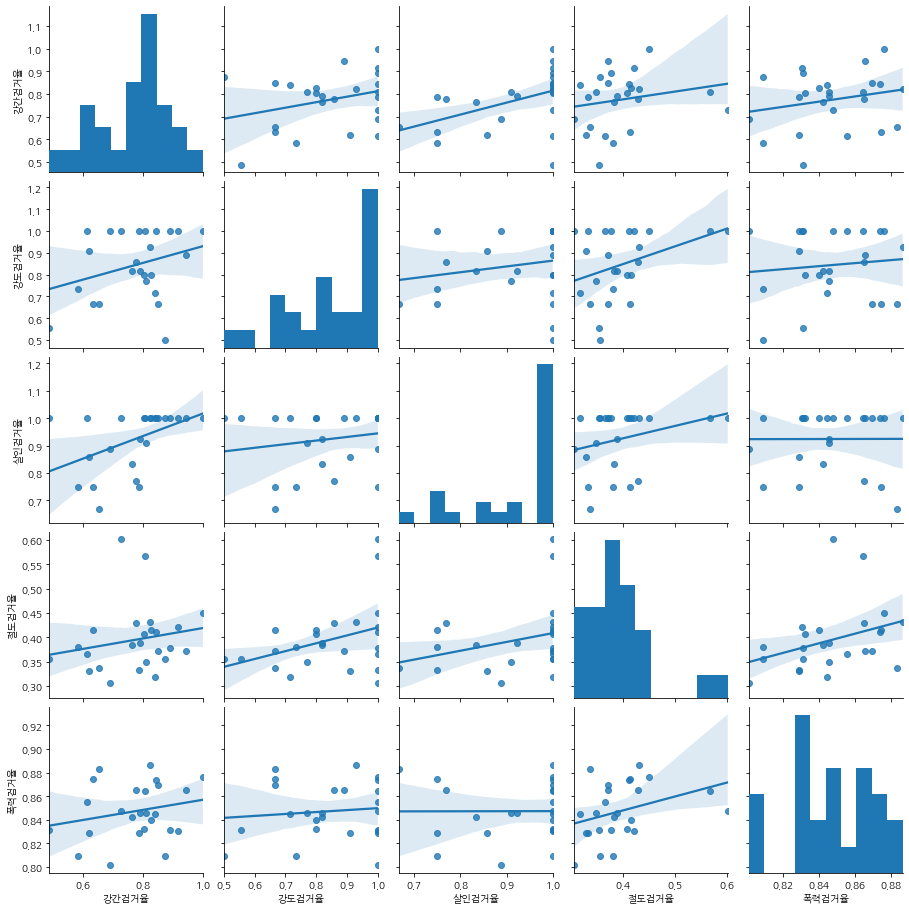

In [29]:
sns.pairplot(crime_in_seoul.iloc[:, 5:10], kind='reg')
plt.show()

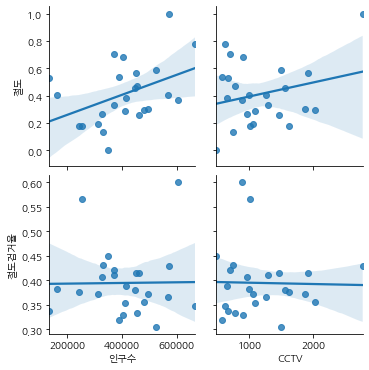

In [30]:
sns.pairplot(crime_in_seoul,
             x_vars=['인구수','CCTV'],
             y_vars=['절도','절도검거율'], kind='reg')
plt.show()

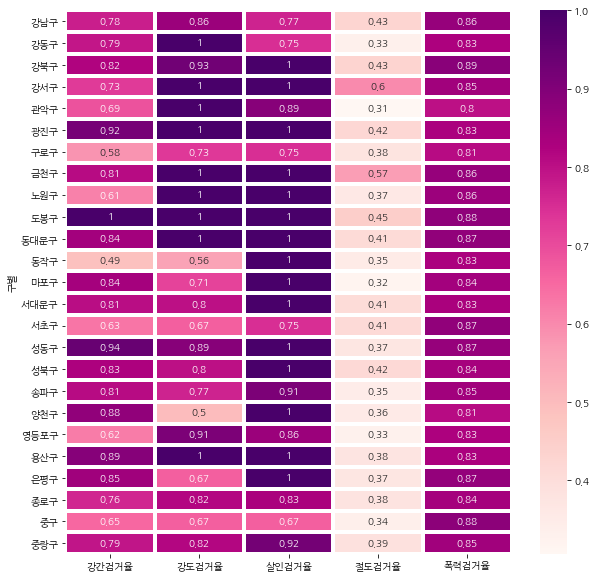

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_in_seoul.iloc[:, 5:10], annot=True, cmap='RdPu', linewidths=3)
plt.show()

In [32]:
lat_lng =[[37.5636465, 126.9895796],
 [37.5755578, 126.9848674],
 [37.5547584, 126.9734981],
 [37.5647848, 126.9667762],
 [37.5718529, 126.9989143],
 [37.5387099, 126.9659183],
 [37.5897482, 127.0161353],
 [37.58506149999999, 127.0457679],
 [37.550814, 126.954028],
 [37.5153176, 126.905728],
 [37.5617309, 127.0363806],
 [37.5130866, 126.9428498],
 [37.542873, 127.083821],
 [37.591836, 126.9053648],
 [37.63730390000001, 127.0273399],
 [37.4568722, 126.8970429],
 [37.5990885, 127.0956516],
 [37.5094352, 127.0669578],
 [37.4743789, 126.9509748],
 [37.5516732, 126.8499269],
 [37.528511, 127.1268224],
 [37.6020592, 127.0321577],
 [37.494931, 126.886731],
 [37.4956054, 127.0052504],
 [37.5165667, 126.8656763],
 [37.5019065, 127.1271513],
 [37.6425238, 127.0717076],
 [37.4945959, 126.9831279],
 [37.6283597, 126.9287226],
 [37.6533589, 127.052682],
 [37.49349, 127.0772119]]

In [33]:
# !pip install folium

In [34]:
len(lat_lng)

31

In [36]:
import folium

In [37]:
my_map = folium.Map

In [41]:
my_map = folium.Map(location=[37.562642, 126.839817], zoom_start=18)
# my_map

In [43]:
my_map = folium.Map(location=[37.562642, 126.839817], zoom_start=11, tiles="Stamen Terrain")
# my_map

In [44]:
crime_in_seoul = pd.read_csv('data-files/b.normed-crime-in-seoul.csv', 
                            encoding="utf-8", index_col="구별")

In [45]:
import json

In [46]:
with open('data-files/b.geo-simple.json', encoding="utf-8") as f:
    geo_simple = json.load(f)

# geo_simple

In [48]:
my_map = folium.Map(location=[37.566688, 126.978419], 
                    # tiles="Stamen Terrain",
                    zoom_start=10)
my_map.choropleth(geo_data = geo_simple, 
                  data = crime_in_seoul["살인"], 
                  fill_color = "PuRd", 
                  key_on = 'feature.id')
my_map

In [49]:
my_map = folium.Map(location=[37.566688, 126.978419], zoom_start=11)
for lat, lng in lat_lng:
    folium.Marker([lat, lng]).add_to(my_map)

my_map

In [50]:
cis = pd.read_csv('data-files/b.crime-in-seoul.csv', 
                   encoding='utf-8', 
                   thousands=",")

In [51]:
cis.head()
cis['범죄'] = cis.iloc[:,1:10:2].sum(axis=1)
cis.head()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,범죄
0,중부서,2,2,3,2,105,65,1395,477,1355,1170,2860
1,종로서,3,3,6,5,115,98,1070,413,1278,1070,2472
2,남대문서,1,0,6,4,65,46,1153,382,869,794,2094
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711,4029
4,혜화서,3,2,5,4,96,63,1114,424,1015,861,2233


In [52]:
my_map = folium.Map(location=[37.566688, 126.978419], zoom_start=11)

for idx, loc in enumerate(lat_lng):
    # print(loc)
    # print(cis.iloc[idx,-1])
    folium.CircleMarker(loc, radius=float(cis.iloc[idx,-1])/100, 
                        fill=True).add_to(my_map)

my_map